# Compare Confidence Interval Approach to Beta Posterior
- Per Lecture 60

### Imports

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, beta

### Constants

In [70]:
T = 501 # Number of iterations
TRUE_CR_RATE = 0.5 # True click through rate
PLOT_INDICES = (10, 20, 30, 50, 100, 200, 500, 1000)

### Variables

In [73]:
a, b = 1, 1 # Beta priors, which at 1 and 1 are non-informative or uniform distributions 
data = np.empty(T)

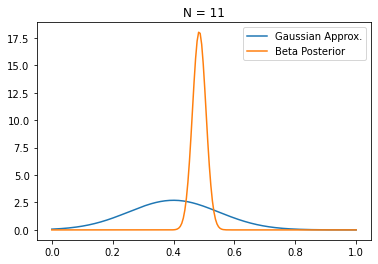

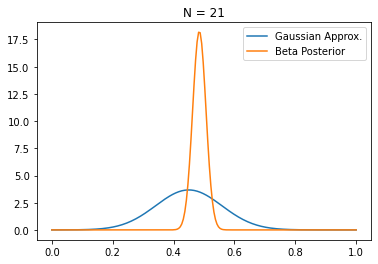

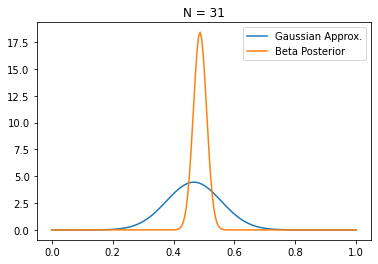

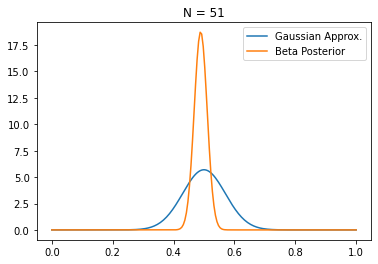

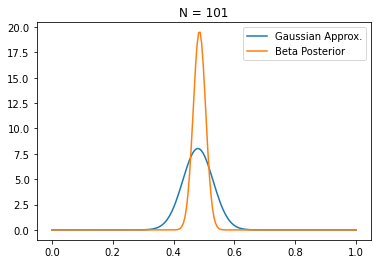

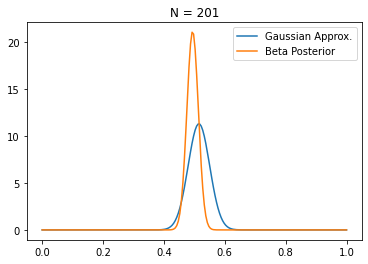

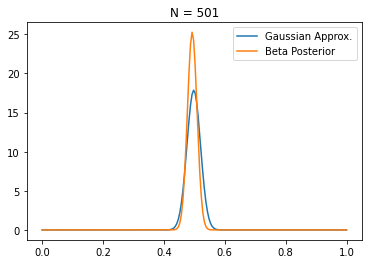

In [75]:
for i in range(T):
    # Get a sample
    x = 1 if np.random.random() < TRUE_CR_RATE else 0
    # Store the sample
    data[i] = x
    
    # Update beta dist
    a += x
    b += 1 -x
    
    # Plot
    if i in PLOT_INDICES:
        # Mean of estimated click through rate
        p = data[:i].mean()
        # Update sample count
        n = i + 1
        # Get st.dev
        std = np.sqrt(p*(1-p)/n)
        
        # X-axis for plot
        x = np.linspace(0, 1, 200)
        # Y-axis is pdf with mean = p and scale = st.dev
        g = norm.pdf(x, loc=p, scale=std)
        plt.plot(x, g, label='Gaussian Approx.')
        
        # Second Y-axis is Beta Posterior
        posterior = beta.pdf(x, a=a, b=b)
        plt.plot(x, posterior, label='Beta Posterior')
        plt.legend()
        plt.title("N = {}".format(n))
        plt.show()